<a href="https://colab.research.google.com/github/ShivinM-17/Tensorflow_practises/blob/main/multiclass_classification_neuralnetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Classification using neural networks

Dataset - Fashion-mnist dataset

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

### Loading the dataset

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

# The dataa has already been sorted into training and testing sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# Show the training and testing data
print(f"Training samples:\n {train_data[0]}")
print(f"\nTesting samples:\n {test_data[0]}")

Training samples:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [3]:
# Checking the shape of the data sample
print(train_data[0].shape, test_data[0].shape)
print(train_labels[0].shape, test_labels[0].shape)

(28, 28) (28, 28)
() ()


### Checking out the data

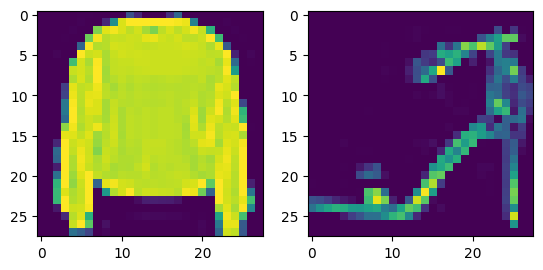

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(train_data[7])
plt.subplot(1,2,2)
plt.imshow(train_data[8])

In [5]:
# Checking out the above samples labels
train_labels[7], train_labels[8]

(2, 5)

In [6]:
# Creating a small list for indexing labels to the given data labesl
# Just gives each labels a name accordingly
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal",
               "Shirt","Sneaker","Bag","Ankle Boot"]

In [7]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [8]:
len(class_names)

10

Since we are dealing with more than 1 class of data, therefore this is the case of multiclass classification

Text(0.5, 1.0, 'T-shirt/top')

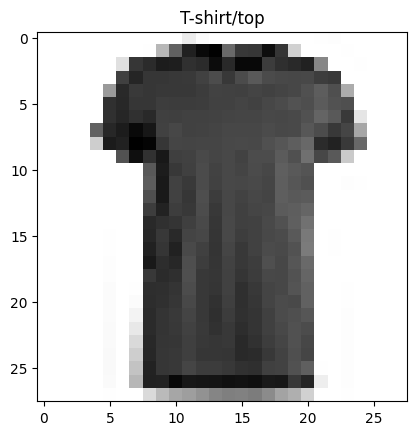

In [9]:
# Plotting an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

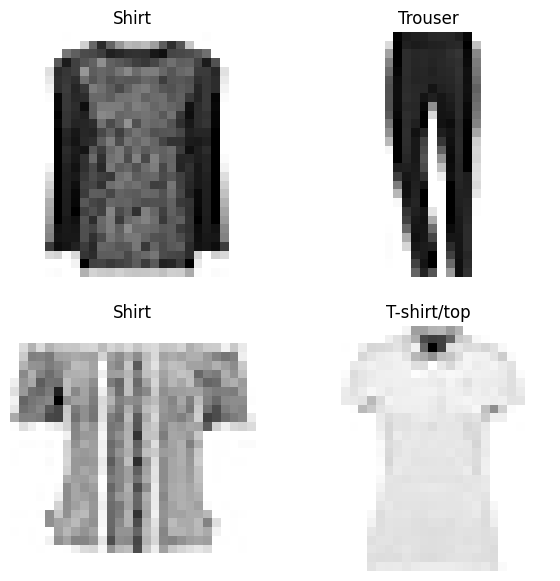

In [10]:
# Plotting multiple random images of fashion MNIST dataset
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Making a multiclass classification model

For this model, we'll be using a similar architecture to binary classifiers, but also tweaking a few things in it. (Check the below attributes before)
* Input shape = (28,28) - shape of 1 image
* Output shape = 10 - One per class of cloths
* Loss function - tf.keras.losses.CategoricalCrossentropy()
* Output layer activation function = Softmax

**Note:-**
* If the labels are in integer format, then use SparseCategoricalCrossentropy()
* If the labels are in one-hot-encoded format, then simply use the CategoricalCrossentropy()

In [11]:
train_data.shape

(60000, 28, 28)

In [12]:
len(class_names)

10

In [13]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape  # ---> 28 * 28

(None, 784)

#### Making model with integer labels

In [14]:
# Making the model

# Set the random seed
tf.random.set_seed(42)

# Create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiling the model
model1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["Accuracy"])

# History
non_norm_history = model1.fit(train_data,
                              train_labels,
                              epochs=25,
                              validation_data=[test_data,test_labels])

Epoch 1/25
1875/1875 [==============================] - 12s 5ms/step - loss: 2.6024 - Accuracy: 0.0990 - val_loss: 2.3030 - val_Accuracy: 0.1000
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - Accuracy: 0.0985 - val_loss: 2.3028 - val_Accuracy: 0.1000
Epoch 3/25
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - Accuracy: 0.1002 - val_loss: 2.3028 - val_Accuracy: 0.1000
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - Accuracy: 0.0975 - val_loss: 2.3028 - val_Accuracy: 0.1000
Epoch 5/25
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - Accuracy: 0.0973 - val_loss: 2.3028 - val_Accuracy: 0.1000
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - Accuracy: 0.0992 - val_loss: 2.3028 - val_Accuracy: 0.1000
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - Accuracy: 0.0987 - val_loss: 2.3028 - val_Accuracy

In [15]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


<Axes: >

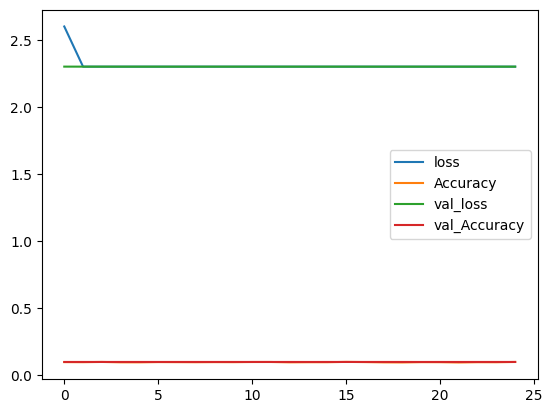

In [16]:
pd.DataFrame(non_norm_history.history).plot()

#### Making model with one-hot encoded labels

In [17]:
one_hot_labels = tf.one_hot(test_labels, depth=10)
one_hot_labels

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [18]:
# Making the model

# Set the random seed
tf.random.set_seed(42)

# Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiling the model
model2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["Accuracy"])

# History
non_norm_history2 = model2.fit(train_data,
                             tf.one_hot(train_labels, depth=10),
                              epochs=25,
                              validation_data=[test_data,tf.one_hot(test_labels, depth=10)])

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8761 - Accuracy: 0.2531 - val_loss: 1.6922 - val_Accuracy: 0.2936
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6607 - Accuracy: 0.2955 - val_loss: 1.6276 - val_Accuracy: 0.3250
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6027 - Accuracy: 0.3208 - val_loss: 1.5819 - val_Accuracy: 0.3350
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5972 - Accuracy: 0.3280 - val_loss: 1.5655 - val_Accuracy: 0.3442
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5538 - Accuracy: 0.3375 - val_loss: 1.5381 - val_Accuracy: 0.3488
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5563 - Accuracy: 0.3351 - val_loss: 1.5368 - val_Accuracy: 0.3456
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5340 - Accuracy: 0.3451 - val_loss: 1.5272 - val_Accuracy:

In [19]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [20]:
model2.evaluate(test_data,tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 0s 1ms/step - loss: 1.4662 - Accuracy: 0.3704


[1.4662445783615112, 0.37040001153945923]

#### Normalising the training and testing data

**Note:-** Neural network prefer data to be scaled (or normalised), meaning they like to have numbers between 0 and 1

In [21]:
# Getting the minimum and maximum values of the training data
train_data.max(), train_data.min()

(255, 0)

In [22]:
# Getting the training and testing data to the range of 0 and 1 by dividing
# the maximum value of the training data
training_data_norm = train_data / 255
testing_data_norm = test_data/ 255

# Now, again checking out the max and min values of the data
training_data_norm.max(), training_data_norm.min()

(1.0, 0.0)

#### Making a model to train on the the normalised data

In [23]:
# Setting the random seed
tf.random.set_seed(42)

# Create the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compiling the model
# Compiling the model
model3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["Accuracy"])

# History
norm_history = model3.fit(training_data_norm,
                          train_labels,
                          epochs=25,
                          validation_data=[testing_data_norm,test_labels])

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3938 - Accuracy: 0.4574 - val_loss: 1.0986 - val_Accuracy: 0.5350
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9994 - Accuracy: 0.6182 - val_loss: 0.9587 - val_Accuracy: 0.6507
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8549 - Accuracy: 0.6979 - val_loss: 0.8327 - val_Accuracy: 0.6999
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7613 - Accuracy: 0.7341 - val_loss: 0.7563 - val_Accuracy: 0.7393
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7144 - Accuracy: 0.7524 - val_loss: 0.7520 - val_Accuracy: 0.7357
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6897 - Accuracy: 0.7580 - val_loss: 0.7186 - val_Accuracy: 0.7517
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6769 - Accuracy: 0.7622 - val_loss: 0.7097 - val_Accuracy:

In [24]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


#### Comparing normalised and non-normalised data

<Axes: >

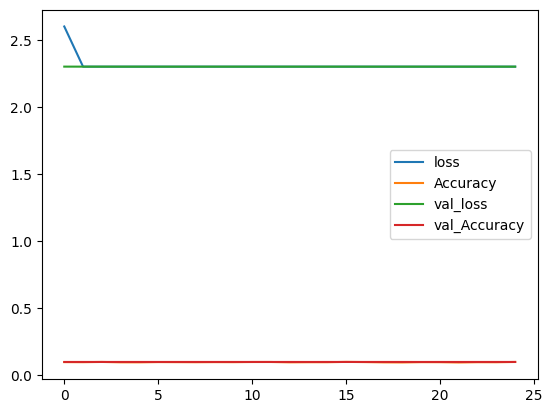

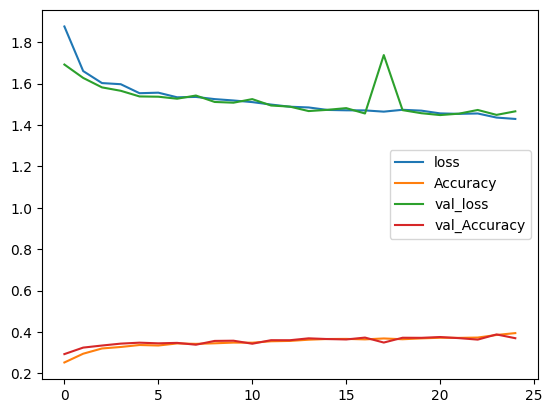

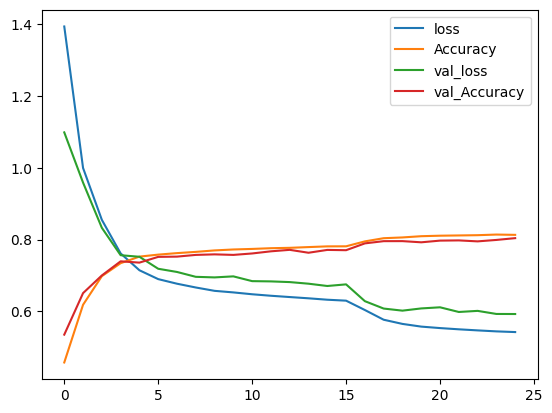

In [25]:
# Plotting loss curves of the three models
pd.DataFrame(non_norm_history.history).plot()
pd.DataFrame(non_norm_history2.history).plot()
pd.DataFrame(norm_history.history).plot()

### Finding the ideal learning rate

In [26]:
# Set the random seed
tf.random.set_seed(42)

# Creating the model
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compiling the model
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3* 10**(epoch/20))

# Fit the model
find_lr_history = model4.fit(training_data_norm,
                             train_labels,
                             epochs=50,
                             validation_data=[testing_data_norm,test_labels],
                             callbacks=[lr_scheduler])

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4016 - accuracy: 0.4592 - val_loss: 0.9833 - val_accuracy: 0.6691 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6986 - accuracy: 0.7390 - val_loss: 0.6627 - val_accuracy: 0.7525 - lr: 0.0011
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6180 - accuracy: 0.7745 - val_loss: 0.6258 - val_accuracy: 0.7721 - lr: 0.0013
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5852 - accuracy: 0.7855 - val_loss: 0.6027 - val_accuracy: 0.7818 - lr: 0.0014
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5671 - accuracy: 0.7915 - val_loss: 0.6041 - val_accuracy: 0.7807 - lr: 0.0016
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5547 - accuracy: 0.7951 - val_loss: 0.5886 - val_accuracy: 0.7843 - lr: 0.0018
Epoch 7/50
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

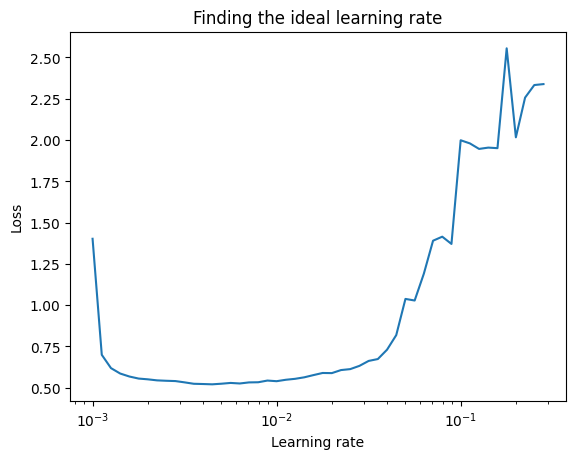

In [27]:
# Plotting the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(50)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

Seems that the ideal learning rate lies between 1e-3 and 1e-2

### Making a model with the ideal learning rate

In [28]:
# Set the random seed
tf.random.set_seed(42)

# Creating the model
model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compiling the model
model5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
find_lr_history = model5.fit(training_data_norm,
                             train_labels,
                             epochs=20,
                             validation_data=[testing_data_norm,test_labels]
                             )

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1822 - accuracy: 0.5709 - val_loss: 0.9506 - val_accuracy: 0.6273
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8633 - accuracy: 0.6651 - val_loss: 0.8613 - val_accuracy: 0.6746
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7600 - accuracy: 0.7074 - val_loss: 0.7677 - val_accuracy: 0.7018
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7031 - accuracy: 0.7261 - val_loss: 0.7285 - val_accuracy: 0.7214
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6741 - accuracy: 0.7360 - val_loss: 0.7166 - val_accuracy: 0.7262
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6524 - accuracy: 0.7528 - val_loss: 0.6868 - val_accuracy: 0.7503
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6251 - accuracy: 0.7817 - val_loss: 0.6586 - val_accuracy:

### Evaluating the model

#### Confusion Matrix

In [29]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matric(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # Normalize the confusion matrix
  n_classes = cm.shape[0]

  # Now, prettifying it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = "Confusion matrix",
        xlabel = "Predicted Label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels
  )

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Setting the threshold for the different colors
  threshold = (cm.max()+cm.min())/2.

  # Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i , f"{cm[i,j]} ({cm_norm[i,j]*100:.1f})%)",
            horizontalalignment = "center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

In [30]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [31]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [33]:
# Making some predictions with the model
y_probs = model5.predict(testing_data_norm)
y_probs

313/313 [==============================] - 1s 3ms/step


array([[2.2504632e-03, 4.9997133e-04, 1.5634560e-03, ..., 1.2655392e-01,
        2.6595006e-03, 7.1560889e-01],
       [3.6837738e-03, 2.4608991e-05, 7.6555276e-01, ..., 3.6729987e-36,
        1.6862062e-08, 7.1948761e-26],
       [2.7367938e-07, 9.9935979e-01, 5.7498319e-04, ..., 0.0000000e+00,
        1.1926754e-12, 3.9331099e-16],
       ...,
       [3.3785209e-02, 1.6989998e-07, 8.6106174e-04, ..., 1.0971293e-07,
        7.5143844e-01, 2.8999104e-13],
       [4.3479376e-06, 9.9774134e-01, 1.2941508e-03, ..., 6.9615251e-33,
        2.7825322e-09, 1.0302539e-11],
       [2.4970243e-04, 1.4020447e-05, 3.0241380e-04, ..., 1.0464446e-02,
        3.4602463e-02, 5.5413643e-06]], dtype=float32)

Note - make prediction from model using same type of data only

In [34]:
# Convert all the predicition probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 predictions
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

#### Creating the confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred=y_preds)

array([[728,   4,  22,  83,   2,   2, 143,   2,  13,   1],
       [  2, 959,  15,  19,   2,   0,   3,   0,   0,   0],
       [ 14,   7, 779,   9, 121,   0,  64,   0,   5,   1],
       [ 43,  22,  17, 817,  48,   1,  45,   1,   6,   0],
       [  0,   3, 165,  18, 721,   0,  87,   0,   6,   0],
       [  0,   0,   1,   0,   0, 907,   0,  45,   8,  39],
       [130,   9, 139,  33, 113,   0, 554,   0,  19,   3],
       [  0,   0,   0,   0,   0,  36,   0, 919,   1,  44],
       [  0,   1,   2,  10,   6,   8,  37,  13, 923,   0],
       [  0,   0,   0,   0,   0,  19,   0,  45,   1, 935]])

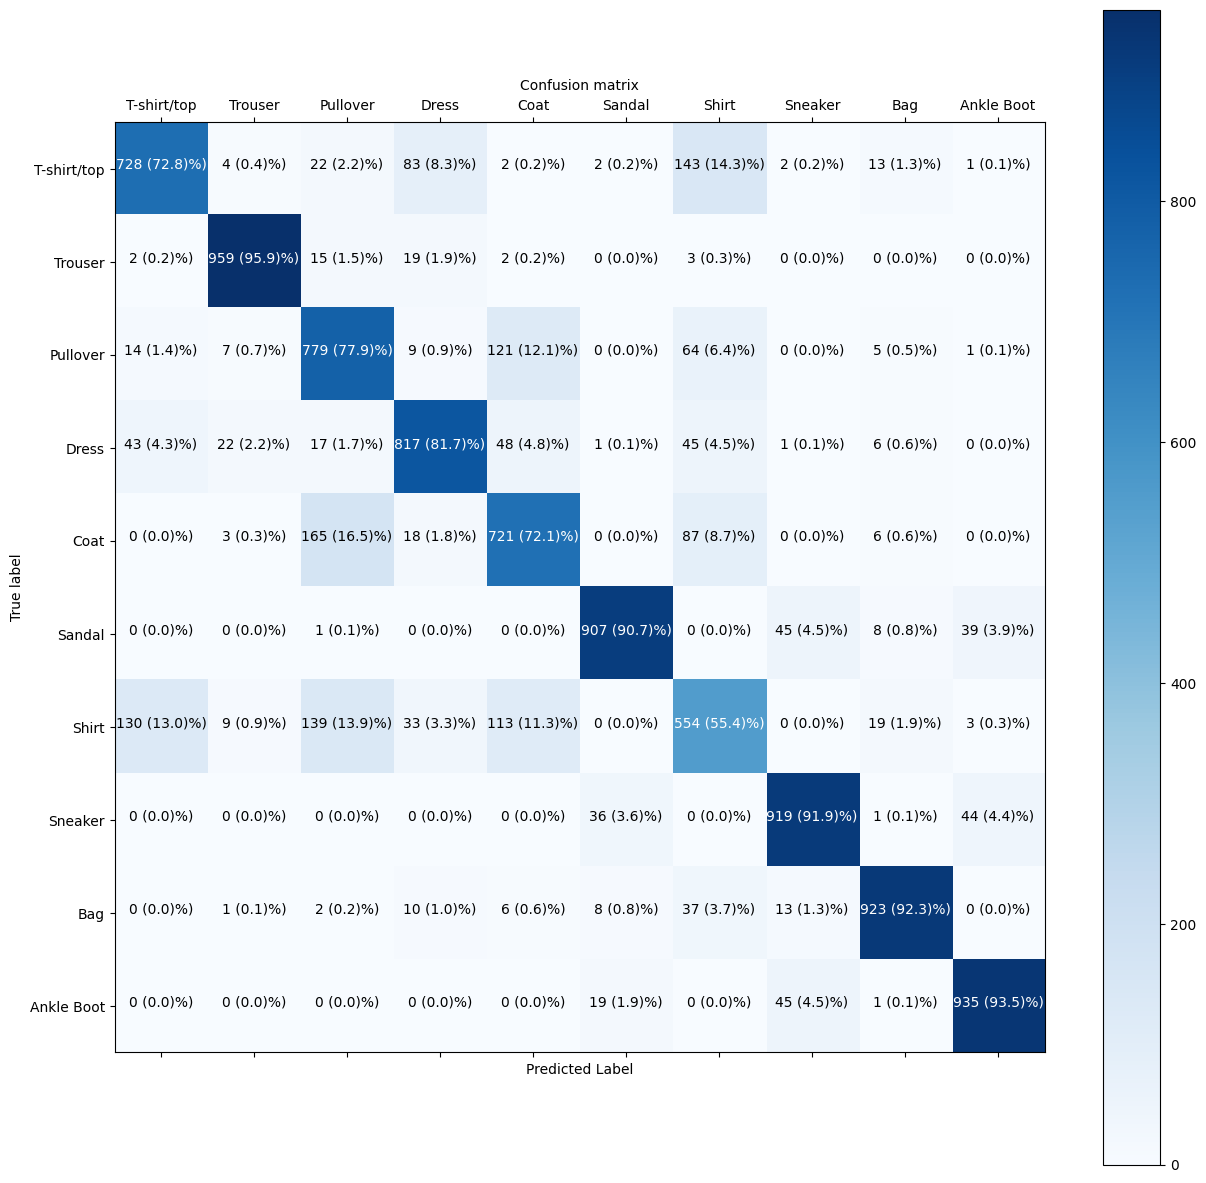

In [40]:
# Making a prettifyied confusion matrix
make_confusion_matric(y_true = test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

### Visualising random plot predictions

In [49]:
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 21ms/step


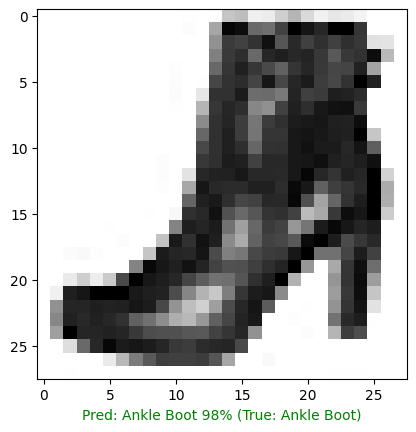

In [55]:
# Now, using the above function
plot_random_image(model=model5,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

### Learning patterns of the model

In [56]:
model5.layers

In [57]:
# Extracting a particular layer
model5.layers[1]

In [59]:
# Get the learning patterns of a layer
weights, biases = model5.layers[1].get_weights()

weights, weights.shape

(array([[-0.46938133,  0.2679452 ,  0.59302235,  0.4681489 ],
        [-0.68633777,  0.7369606 ,  0.97974503, -0.33094493],
        [-0.9648414 ,  0.23128743,  0.38772747,  0.6984896 ],
        ...,
        [ 0.00818789, -0.06755122,  0.28003225, -0.3484149 ],
        [ 0.02724257,  0.04799044,  0.33614087, -0.425512  ],
        [-0.14984216,  0.8361521 ,  0.3019297 , -0.46466854]],
       dtype=float32),
 (784, 4))

In [60]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


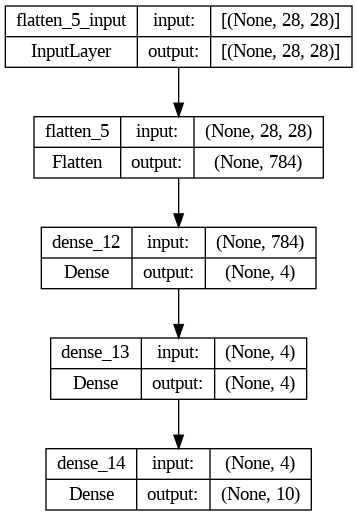

In [62]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model5, show_shapes=True)